In [2]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster._kmeans import KMeans
pd.set_option('display.max_rows', 25000)


In [3]:

data = pd.read_csv("Data.csv", low_memory = False)

ad = data.member_id.value_counts()



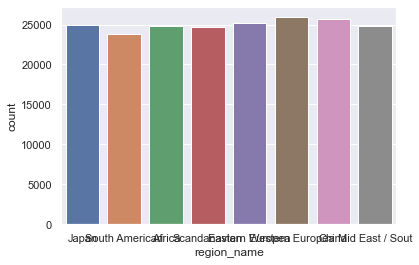

In [10]:

sns.set_theme(style="darkgrid")
ax = sns.countplot(data=data, x="region_name")
plt.show()


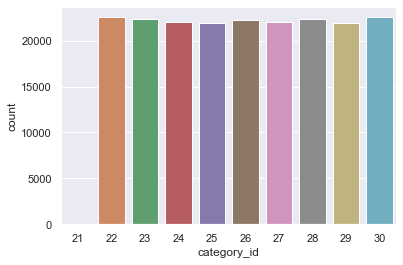

In [8]:



sns.set_theme(style="darkgrid")
ax = sns.countplot(data=data, x="category_id")
plt.show()



In [ ]:



#sns.distplot(data[data['stroke'] == 0]["age"], color='green') # No Stroke - green
#sns.distplot(data[data['stroke'] == 1]["age"], color='red') # Stroke - Red

#plt.title('No Stroke vs Stroke by Age', fontsize=15)
#plt.xlim([18,100])
#plt.show()


# Get names of columns with missing values
cols_with_missing = [col for col in data.columns
                     if data[col].isnull().any()]
print(cols_with_missing)

# Imputation
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Apply label encoder to each column with categorical data
le = LabelEncoder()
data['ever_married'] = le.fit_transform(data['ever_married'])
data['Residence_type'] = le.fit_transform(data['Residence_type'])

#data.replace(to_replace="Urban", value=1, inplace=True)
#data.replace(to_replace="Rural", value=0, inplace=True)

#data.replace(to_replace="Yes", value=1, inplace=True)
#data.replace(to_replace="No", value=0, inplace=True)

data = pd.get_dummies(data, columns=['work_type', 'smoking_status', 'gender'])
data.drop(columns=['id'], inplace=True)
data.head()

y = data['stroke']
y = y.astype(np.float32)
X = data.drop(['stroke'], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.25 ,random_state=0)


rfClassifier = RandomForestClassifier()
rfClassifier.fit(X_train, y_train)
y_pred=rfClassifier.predict(X_test)


print('Accuracy Score: ' , metrics.accuracy_score(y_test, y_pred))
